### Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy

### Initialize a training image generator

In [2]:
training_image_generator = ImageDataGenerator(
                                                rescale = 1./255, 
                                                zoom_range = 0.1, 
                                                rotation_range = 15, 
                                                width_shift_range = 0.05,
                                                height_shift_range = 0.05, 
                                                vertical_flip = True
                                            )

### Loading image data from directory

In [3]:
training_iterator = training_image_generator.flow_from_directory(
                                                                'Covid19-dataset/train', 
                                                                class_mode = 'categorical', 
                                                                color_mode = 'grayscale', 
                                                                batch_size = 12,
                                                                target_size = (128, 128)
                                                        )

Found 251 images belonging to 3 classes.


In [4]:
training_iterator.samples

251

In [5]:
sample_batch_input, sample_labels = training_iterator.next()

In [6]:
sample_batch_input.shape

(12, 128, 128, 1)

In [7]:
sample_labels.shape

(12, 3)

### Building the model

In [8]:
model = tf.keras.Sequential()

In [9]:
model.add(tf.keras.Input(shape = (128, 128, 1)))
model.add(layers.Conv2D(8, 3, strides=3, padding = 'same', activation="relu")) 
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(5, 3, strides=1, padding = 'same', activation="relu")) 
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(3, 3, strides=1, padding = 'same', activation="relu"))
model.add(tf.keras.layers.Conv2D(2, 2, strides=1, padding = 'same', activation="relu"))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Flatten())
model.add(layers.Dense(3,activation="softmax"))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 43, 43, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 21, 21, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 21, 21, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 5)         365       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 5)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 5)         0

### Initialize validation image generator

In [10]:
validation_image_generator = ImageDataGenerator(rescale = 1./255)

In [11]:
validation_iterator = validation_image_generator.flow_from_directory(
                                                                'Covid19-dataset/test', 
                                                                class_mode = 'categorical', 
                                                                color_mode = 'grayscale', 
                                                                batch_size = 12,
                                                                target_size = (128, 128)
                                                        )

Found 66 images belonging to 3 classes.


In [12]:
validation_iterator.samples

66

### Training the model

In [13]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

In [14]:
history = model.fit(
                    training_iterator,
                    steps_per_epoch=training_iterator.samples/12, epochs=100,
                    validation_data=validation_iterator,
                    validation_steps=validation_iterator.samples/12,
                    callbacks=[es]
                    )

Epoch 1/100
20/20 [==============================] - 11s 351ms/step - loss: 1.0871 - categorical_accuracy: 0.4422 - auc: 0.5738 - val_loss: 1.0834 - val_categorical_accuracy: 0.3939 - val_auc: 0.6077
Epoch 2/100
20/20 [==============================] - 6s 277ms/step - loss: 1.0747 - categorical_accuracy: 0.4422 - auc: 0.5786 - val_loss: 1.0735 - val_categorical_accuracy: 0.3939 - val_auc: 0.6869
Epoch 3/100
20/20 [==============================] - 7s 308ms/step - loss: 1.0566 - categorical_accuracy: 0.4422 - auc: 0.6479 - val_loss: 1.0547 - val_categorical_accuracy: 0.3939 - val_auc: 0.7051
Epoch 4/100
20/20 [==============================] - 6s 294ms/step - loss: 1.0227 - categorical_accuracy: 0.4422 - auc: 0.7061 - val_loss: 1.0224 - val_categorical_accuracy: 0.3939 - val_auc: 0.7145
Epoch 5/100
20/20 [==============================] - 6s 264ms/step - loss: 0.9872 - categorical_accuracy: 0.4502 - auc: 0.7264 - val_loss: 0.9180 - val_categorical_accuracy: 0.4848 - val_auc: 0.7739
Epoc

20/20 [==============================] - 6s 286ms/step - loss: 0.3308 - categorical_accuracy: 0.8566 - auc: 0.9690 - val_loss: 0.2876 - val_categorical_accuracy: 0.9242 - val_auc: 0.9768
Epoch 43/100
20/20 [==============================] - 6s 273ms/step - loss: 0.3310 - categorical_accuracy: 0.8884 - auc: 0.9705 - val_loss: 0.2810 - val_categorical_accuracy: 0.9242 - val_auc: 0.9784
Epoch 44/100
20/20 [==============================] - 5s 255ms/step - loss: 0.2733 - categorical_accuracy: 0.8964 - auc: 0.9798 - val_loss: 0.2538 - val_categorical_accuracy: 0.9242 - val_auc: 0.9823
Epoch 45/100
20/20 [==============================] - 6s 272ms/step - loss: 0.2802 - categorical_accuracy: 0.8924 - auc: 0.9777 - val_loss: 0.2346 - val_categorical_accuracy: 0.9091 - val_auc: 0.9857
Epoch 46/100
20/20 [==============================] - 5s 257ms/step - loss: 0.3897 - categorical_accuracy: 0.8367 - auc: 0.9583 - val_loss: 0.3940 - val_categorical_accuracy: 0.8182 - val_auc: 0.9527
Epoch 47/100


20/20 [==============================] - 7s 323ms/step - loss: 0.2608 - categorical_accuracy: 0.8884 - auc: 0.9808 - val_loss: 0.2319 - val_categorical_accuracy: 0.9091 - val_auc: 0.9842
Epoch 84/100
20/20 [==============================] - 9s 450ms/step - loss: 0.2774 - categorical_accuracy: 0.9004 - auc: 0.9781 - val_loss: 0.2320 - val_categorical_accuracy: 0.9545 - val_auc: 0.9850
Epoch 85/100
20/20 [==============================] - 11s 516ms/step - loss: 0.2997 - categorical_accuracy: 0.8645 - auc: 0.9747 - val_loss: 0.2268 - val_categorical_accuracy: 0.9545 - val_auc: 0.9850
Epoch 00085: early stopping


### Visualize training parameters

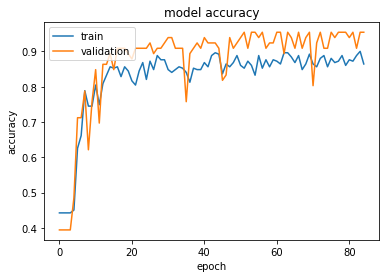

In [15]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

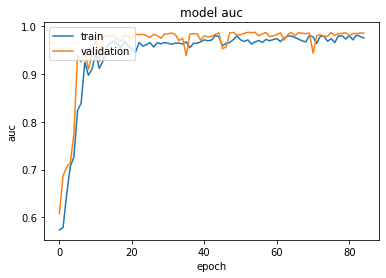

In [16]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.xlabel('epoch')
plt.ylabel('auc')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Viewing prediction report

In [22]:
test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / validation_iterator.batch_size)
predictions = model.predict(validation_iterator, steps=test_steps_per_epoch)
predicted_classes = numpy.argmax(predictions, axis=1)
true_classes = validation_iterator.classes
class_labels = list(validation_iterator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       Covid       0.42      0.42      0.42        26
      Normal       0.24      0.25      0.24        20
   Pneumonia       0.37      0.35      0.36        20

    accuracy                           0.35        66
   macro avg       0.34      0.34      0.34        66
weighted avg       0.35      0.35      0.35        66



In [23]:
cm=confusion_matrix(true_classes,predicted_classes)
print(cm)

[[11  7  8]
 [11  5  4]
 [ 4  9  7]]
